# Import Package

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
plt.style.use('seaborn')
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Load Data

In [2]:
gdp = pd.read_csv('gdp australia.csv')
LE = pd.read_csv('life expectancy australia.csv')

In [3]:
gdp

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change
0,1962-12-31,19.892485,1851.8419,1.2961
1,1963-12-31,21.507448,1964.1505,6.2146
2,1964-12-31,23.764139,2128.0684,6.9785
3,1965-12-31,25.936835,2277.5584,5.9835
4,1966-12-31,27.268451,2340.4387,2.3825
5,1967-12-31,30.397581,2576.2845,6.3026
6,1968-12-31,32.665472,2720.0826,5.0958
7,1969-12-31,36.628962,2986.9495,7.0443
8,1970-12-31,41.271139,3299.8432,7.1722
9,1971-12-31,45.149513,3489.9523,4.0037


In [4]:
LE

,date,Life Expectancy from Birth (Years),Annual % Change
0,1950-12-31,68.766,NaN
1,1951-12-31,68.974,0.30
2,1952-12-31,69.182,0.30
3,1953-12-31,69.390,0.30
4,1954-12-31,69.598,0.30
...,...,...,...
66,2016-12-31,82.864,0.20
67,2017-12-31,83.032,0.20
68,2018-12-31,83.200,0.20
69,2019-12-31,83.348,0.18


Overview data: 

1. The GDP of Australia data includes the GDP itself, GDP per Capita, and percentage of annual change. This data has 4 columns and 59 rows. Moreover, the GDP data is collected from 1962 to 2021
2. The life expectancy data includes the Life Expectancy from Birth (Years) and percentage of annual change. This data has 3 columns and 71 rows. Moreover, the life expectancy data is collected from 1950 to 2020

Variable of GDP Australia dataset:
1. Date : year-month-date
2. GDP ( Billions of US Dollar) : amount of GDP in billion US Dollar
3. Per Capita (US Dollar) : GDP per Capita in US Dollar
4. Annual % Change: % Change of GDP

Variable of Life Expectancy from Birth Australia dataset:
1. date : year-month-date
2. Life Expectancy from Birth : in years
3. Annual % Change : % Change of Life expectancy from birth

Data Source:
1. GDP Australia:
https://www.macrotrends.net/countries/AUS/australia/gdp-gross-domestic-product
2. Life Expectancy Australia: https://www.macrotrends.net/countries/AUS/australia/life-expectancy

# Merge Dataset

In [5]:
df= pd.merge(gdp, LE, how="inner", on=["date"])

In [6]:
df

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change_x,Life Expectancy from Birth (Years),Annual % Change_y
0,1962-12-31,19.892485,1851.8419,1.2961,70.790,0.13
1,1963-12-31,21.507448,1964.1505,6.2146,70.880,0.13
2,1964-12-31,23.764139,2128.0684,6.9785,70.872,-0.01
3,1965-12-31,25.936835,2277.5584,5.9835,70.864,-0.01
4,1966-12-31,27.268451,2340.4387,2.3825,70.856,-0.01
5,1967-12-31,30.397581,2576.2845,6.3026,70.848,-0.01
6,1968-12-31,32.665472,2720.0826,5.0958,70.840,-0.01
7,1969-12-31,36.628962,2986.9495,7.0443,71.024,0.26
8,1970-12-31,41.271139,3299.8432,7.1722,71.208,0.26
9,1971-12-31,45.149513,3489.9523,4.0037,71.392,0.26


# Data Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 59 non-null     object 
 1    GDP ( Billions of US $)             59 non-null     float64
 2    Per Capita (US $)                   59 non-null     float64
 3    Annual % Change_x                   59 non-null     float64
 4    Life Expectancy from Birth (Years)  59 non-null     float64
 5    Annual % Change_y                   59 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.2+ KB


From the data information above we know that there is no missing values. Besides that, the data type of each column has already appropriate, except date. 

# Data Cleaning

## Change data type of date into datetime

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 59 non-null     datetime64[ns]
 1    GDP ( Billions of US $)             59 non-null     float64       
 2    Per Capita (US $)                   59 non-null     float64       
 3    Annual % Change_x                   59 non-null     float64       
 4    Life Expectancy from Birth (Years)  59 non-null     float64       
 5    Annual % Change_y                   59 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 3.2 KB


From the information above we know that the 'date' column has been changed into datetime 

## Check Duplicated Data

In [10]:
df[df.duplicated(keep=False)]

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change_x,Life Expectancy from Birth (Years),Annual % Change_y


There is no duplicated data

## Trends of Life Expectancy From Birth in Australia

In [11]:
groupby = df[[' Life Expectancy from Birth (Years)','date']].groupby('date').agg({' Life Expectancy from Birth (Years)':'sum'})

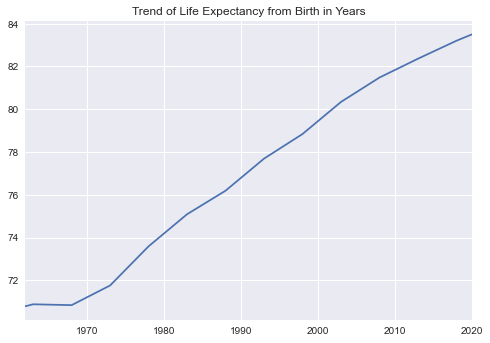

In [12]:
groupby.plot(kind='line', legend=False)
plt.title('Trend of Life Expectancy from Birth in Years')
plt.xlabel('')
plt.show()

**Actual Life Expectancy from Birth Interpretation:**

Overall from 1962 to 2020 Life Expectancy from Birth in Australia rose gradually. Therefore, it can be said that life expectancy in Australia has an upward trend.

# Correlation Between Variables

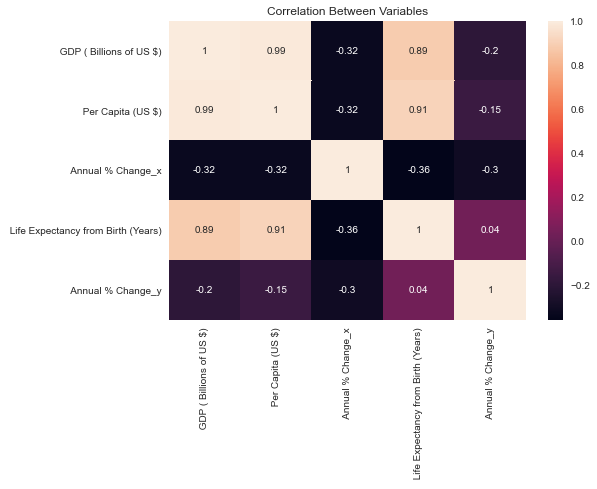

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Between Variables')
plt.show()

From the heatmap above we can conclude:
1. There is a strong correlation between GDP per Capita and GDP since the value of correlation is 0.99 (close to 1). However, we won't use these variables to make a prediction since GDP and GDP per capita show the same thing. However, the difference is that GDP per capita is for income and expenditure of **the average person** in the economy, whereas GDP is for measuring the **total income and total expenditure of the economy** on goods and services.
2. In this case we will use the second highest correlation which is GDP per Capita with Life Expectancy from Birth. There is a strong positive correlation between GDP per Capita with Life Expectancy since the value of correlation (0.91) is close to 1. 
3. **Therefore, we want to predict the life expectancy from birth based on the GDP per Capita.** Moreover, the data needs to be cleaned.

# Data Cleaning

## Drop Unnecessary Column

In [14]:
df = df[[' Per Capita (US $)',' Life Expectancy from Birth (Years)']]

Just keep the GDP per capita and Life Expectancy column

## Check Duplicated Data

In [15]:
df[df.duplicated(keep=False)]

,Per Capita (US $),Life Expectancy from Birth (Years)


There is no duplicated data

## Check Outliers

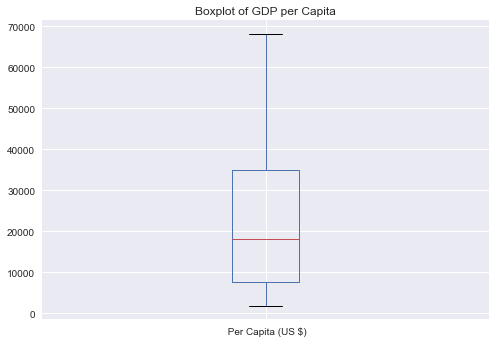

In [16]:
df.boxplot(column=[' Per Capita (US $)'])
plt.title('Boxplot of GDP per Capita')
plt.show()

From the boxplot above we know that there are no outliers, so we don't need to drop the outliers data. Furthermore, GDP per Capita data has a skew to the right.

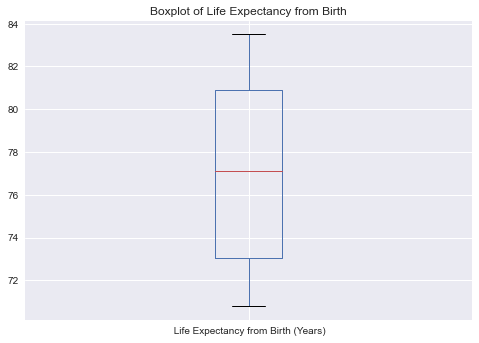

In [17]:
df.boxplot(column=[' Life Expectancy from Birth (Years)'])
plt.title('Boxplot of Life Expectancy from Birth')
plt.show()

From the boxplot above we know that there are no outliers, so we don't need to drop the outliers data. 

# Data Summary

In [18]:
df.describe()

,Per Capita (US $),Life Expectancy from Birth (Years)
count,59.000000,59.000000
mean,23072.654922,76.962271
std,20017.491070,4.277881
min,1851.841900,70.790000
25%,7620.909600,73.041000
50%,18046.136500,77.090000
75%,35022.082850,80.910000
max,68150.107000,83.496000


# Data Visualization

## Scatter Plot of GDP per Capita and Life Expectancy from Birth 

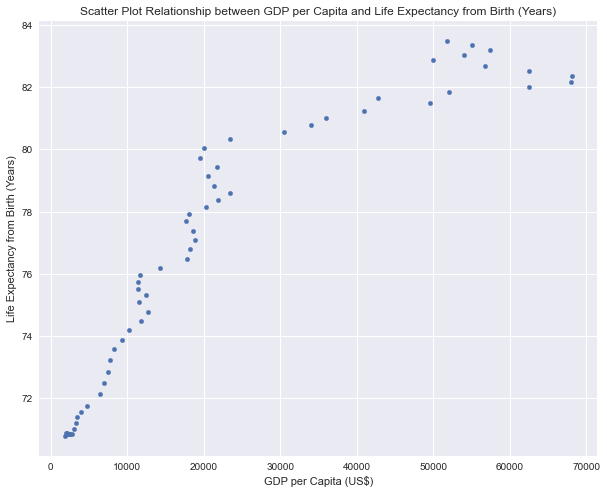

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))  #menunjukkan ukuran dari plot
df.plot(x=' Per Capita (US $)',y=' Life Expectancy from Birth (Years)',ax=ax, kind='scatter')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Life Expectancy from Birth (Years)')
plt.title('Scatter Plot Relationship between GDP per Capita and Life Expectancy from Birth (Years)')
plt.show()

# Create and Fit Model

In [20]:
LR = LinearRegression()

In [21]:
X = df[[' Per Capita (US $)']]
y = df[[' Life Expectancy from Birth (Years)']]

In [22]:
print('X max:', X[' Per Capita (US $)'].max())
print('X min:', X[' Per Capita (US $)'].min())

X max: 68150.107
X min: 1851.8419


In [23]:
model = LR.fit(X,y) # membuat model dari linear regression berdasarkan independent and dependent variable
r_sq = model.score(X, y)
print('Coefficient of determination (R^2):', r_sq)  #mengeluarkan hasil perhitungannya dengan template
print('intercept:', model.intercept_[0])
print('slope:', model.coef_[0][0])

Coefficient of determination (R^2): 0.8287412397689522
intercept: 72.47351450570713
slope: 0.00019454877195111523


Linear Regression Equation : 

**𝑦̂ = 0.00019454877195111523 X + 72.47351450570713**

1. Interpretation of slope: **One unit increment in GDP per capita will increase the percentage of Life Expectancy from birth by 0.000195**
2. Interpretation of intercept: **The starting Life Expectancy from Birth when GDP per Capita is 0 is 72.47**
3. Interpretation of coefficient of determination: **The result of coeficient of determination shows that 82.87% of the total variation in Life Expectancy from Birth is explained by the GDP per Capita. This figure is high enough so that the linear regression can be said to be a suitable model for this prediction. Moreover, we can see that GDP per capita is one of the factor that affects Life Expectancy from Birth in Australia even though there might be other factors.**
4. The linear model just valid for X (GDP per Capita) between 1851.8419 and 68150.107

# Predict Response

In [24]:
H = model.predict(X)
df['Estimated Life Expectancy'] = H  

In [25]:
df['Residual'] = df[' Life Expectancy from Birth (Years)'] - df['Estimated Life Expectancy']
df['Residual Square'] = df['Residual']**2
df

,Per Capita (US $),Life Expectancy from Birth (Years),Estimated Life Expectancy,Residual,Residual Square
0,1851.8419,70.790,72.833788,-2.043788,4.177070
1,1964.1505,70.880,72.855638,-1.975638,3.903144
2,2128.0684,70.872,72.887528,-2.015528,4.062352
3,2277.5584,70.864,72.916611,-2.052611,4.213211
4,2340.4387,70.856,72.928844,-2.072844,4.296682
5,2576.2845,70.848,72.974727,-2.126727,4.522970
6,2720.0826,70.840,73.002703,-2.162703,4.677285
7,2986.9495,71.024,73.054622,-2.030622,4.123425
8,3299.8432,71.208,73.115495,-1.907495,3.638537
9,3489.9523,71.392,73.152480,-1.760480,3.099291


# Visualization of Linear Regression Model

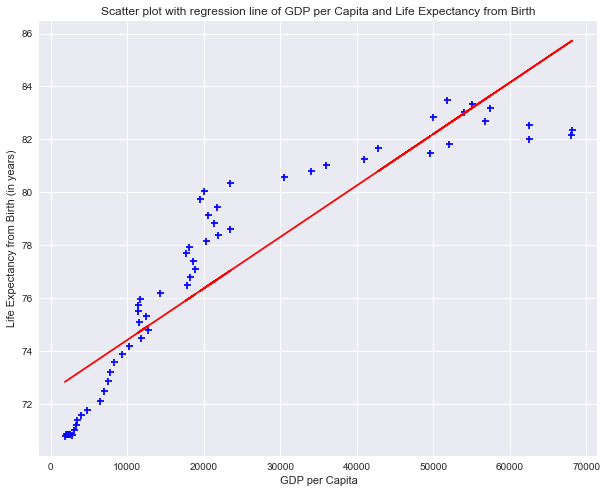

In [26]:
fig, ax = plt.subplots(figsize=(10, 8)) 
plt.scatter(df[' Per Capita (US $)'],df[' Life Expectancy from Birth (Years)'], color="blue", marker="+")
plt.plot(X,LR.predict(X), color="red")
plt.ylabel('Life Expectancy from Birth (in years)')
plt.xlabel('GDP per Capita')
plt.title("Scatter plot with regression line of GDP per Capita and Life Expectancy from Birth")
plt.show()

From the visualization above, we can see that in Australia a higher 'GDP per Capita' is associated with higher 'Life Expectancy from Birth'. Besides that, there are still many estimates that deviate from the actual data at some points. However, the linear correlation between these variables can still be seen considering the coefficient of determination from this modelling is 82.87% which indicates that there is a fairly strong positive correlation

# Linear Model with statsmodels

In [27]:
X_1 = sm.add_constant(df[' Per Capita (US $)'].to_numpy())
y_1 = df[' Life Expectancy from Birth (Years)'].to_numpy()
LR = sm.OLS(y_1, X_1)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     275.8
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.66e-23
Time:                        22:23:13   Log-Likelihood:                -116.91
No. Observations:                  59   AIC:                             237.8
Df Residuals:                      57   BIC:                             242.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.4735      0.357    203.285      0.0

From the summary of the model above, we can draw the following conclusions:
1. The value of skewness (0.072) indicates that the data are fairly symmetrical as the skewness is between -0.5 and 0.5
2. The value of kurtosis (2.172) indicates that the data has lighter tails than a normal distribution since the kurtosis is less than 3
3. Jarque-Bera test dengan alpha 5%, H0: distribusi dari residual adalah distribusi normal, H1: distribusi dari residual bukan distribusi normal. Dari hasil di atas dapat dilihat bahwa Probabilitas dari Jarque-Bera sebesar 0.420 yang artinya lebih besar dari alpha (0.420>0.05), sehingga H0 tidak ditolak. Oleh karena itu, distribusi dari residual adalah distribusi normal
4. Tes statistik durbin watson digunakan untuk mendeteksi autocorrelation pada residual dalam analisis regresi. Dari summary di atas dapat dilihat bahwa nilai dari Durbin-Watson sebesar 0.129 yang menandakan bahwa terdapat positive autocorrelation antar residual. Adanya positive autocorrelation disebabkan karena data yang digunakan merupakan data time series. Hal ini menunjukan bahwa data tahun kemarin berkorelasi positive dengan data tahun berikutnya.